
___
# Logistic Regression with Python

For this lecture we will be working with the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). This is a very famous data set and very often is a student's first step in machine learning! 

We'll be trying to predict a classification- survival or deceased.
Let's begin our understanding of implementing Logistic Regression in Python for classification.

We'll use a "semi-cleaned" version of the titanic data set, if you use the data set hosted directly on Kaggle, you may need to do some additional cleaning not shown in this lecture notebook.

## Import Libraries
Let's import some libraries to get started!

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

AttributeError: module 'numpy' has no attribute 'ndarray'

## The Data

Let's start by reading in the titanic_train.csv file into a pandas dataframe.

In [52]:
train = pd.read_csv('titanic_train.csv')

In [53]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level. We'll probably drop this later, or change it to another feature like "Cabin Known: 1 or 0"

Let's continue on by visualizing some more of the data! Check out the video for full explanations over these plots, this code is just to serve as reference.

In [54]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [55]:
train["Age"].value_counts().sort_index()

Age
0.42     1
0.67     1
0.75     2
0.83     2
0.92     1
        ..
70.00    2
70.50    1
71.00    2
74.00    1
80.00    1
Name: count, Length: 88, dtype: int64

,mean,median,min,max
Pclass,,,,
1,38.233441,37.0,0.92,80.0
2,29.877630,29.0,0.67,70.0
3,25.140620,24.0,0.42,74.0


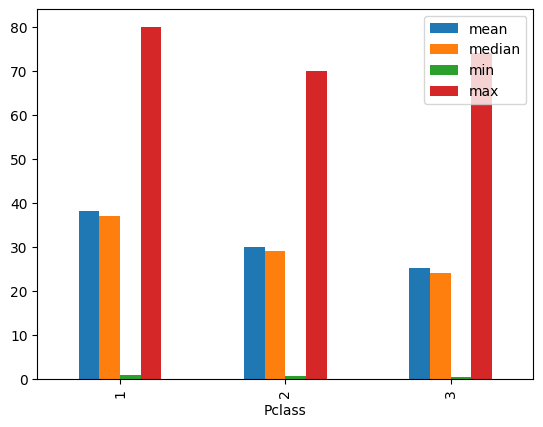

In [56]:
a = train.groupby("Pclass")["Age"].agg(["mean" , "median" , "min" , "max"])
a.plot(kind="bar")
a

In [57]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [58]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

In [59]:
a = train.duplicated().sum()
a

0

In [60]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [61]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.066409,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.244532,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,37.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [62]:
train["Fare"].value_counts().sort_index()

Fare
0.0000      15
4.0125       1
5.0000       1
6.2375       1
6.4375       1
            ..
227.5250     4
247.5208     2
262.3750     2
263.0000     4
512.3292     3
Name: count, Length: 248, dtype: int64

,mean,median,min,max
Pclass,,,,
1,84.154687,60.2875,0.0,512.3292
2,20.662183,14.2500,0.0,73.5000
3,13.675550,8.0500,0.0,69.5500


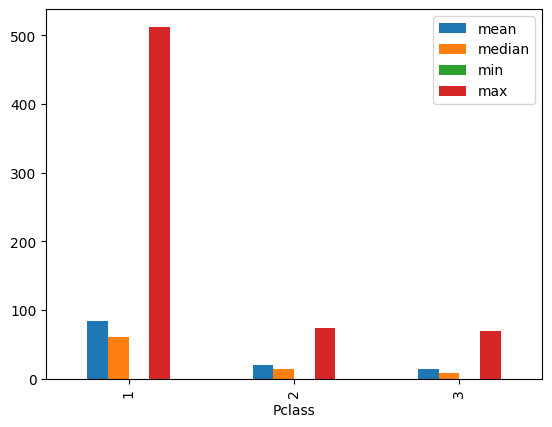

In [63]:
a = train.groupby("Pclass")["Fare"].agg(["mean" , "median" , "min" , "max"])
a.plot(kind="bar")
a

In [64]:
def impute_fare(cols):
    Fare = cols[0]
    Pclass = cols[1]
    
    if Fare==0:

        if Pclass == 1:
            return 60

        elif Pclass == 2:
            return 14

        else:
            return 8

    else:
        return Fare

In [65]:
train['Fare'] = train[['Fare','Pclass']].apply(impute_fare,axis=1)

,mean,median,min,max
Pclass,,,,
1,38.062130,37.0,0.92,80.0
2,29.825163,29.0,0.67,70.0
3,24.824684,24.0,0.42,74.0


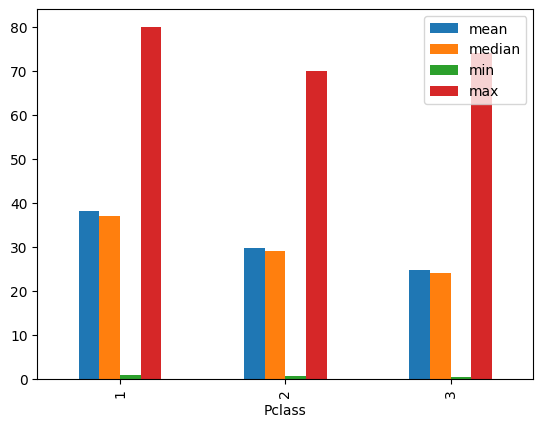

In [66]:
a = train.groupby("Pclass")["Age"].agg(["mean" , "median" , "min" , "max"])
# a = train.groupby("Pclass")["Survived"].mean()
a.plot(kind="bar")
a

,mean,max,min,median
Pclass,,,,
1,38.062130,80.0,0.92,37.0
2,29.825163,70.0,0.67,29.0
3,24.824684,74.0,0.42,24.0


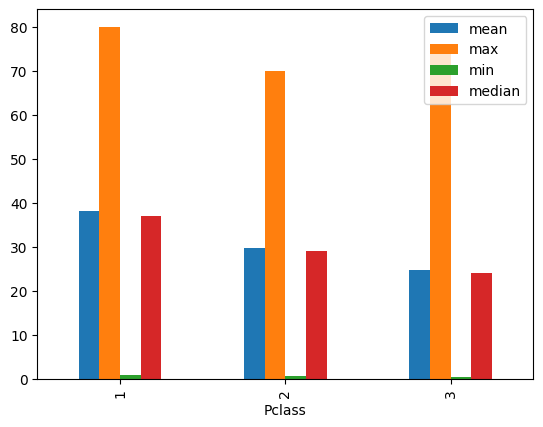

In [67]:
a = train.groupby("Pclass")["Age"].agg(["mean"  , "max" , "min" , "median"])
a.plot(kind="bar")
a

,mean,max,min,median
Pclass,,,,
1,85.543576,512.3292,5.0000,60.5875
2,21.118705,73.5000,10.5000,14.2500
3,13.740723,69.5500,4.0125,8.0500


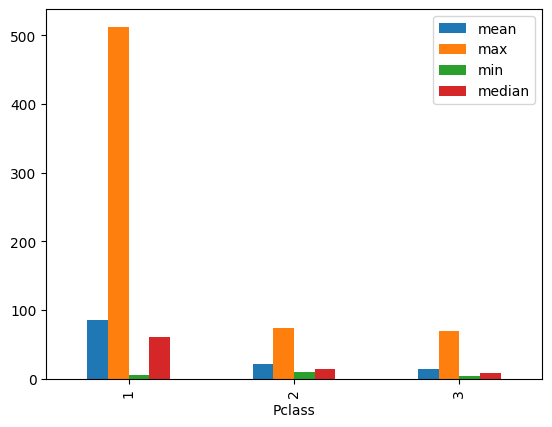

In [68]:
a = train.groupby("Pclass")["Fare"].agg(["mean"  , "max" , "min" , "median"])
a.plot(kind="bar")
a

In [69]:
def new(change):
    fare = change[0]
    Pclass = change[1]
    
    if fare==0.0:
        if Pclass==1:
            return 60
        elif Pclass==2:
            return 14
        elif Pclass==3:
            return 8
    else:
        return fare

In [70]:
train["Fare"]=train[["Fare"  , "Pclass"]].apply(new , axis=1)

In [71]:
train["Sex"] = train["Sex"].apply(lambda a  : 1 if a == "male" else 0 )

In [72]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [73]:
train.drop(["PassengerId" , "Name" ,"Ticket"  , "Cabin" , "Embarked"] , axis=1  , inplace=True)

In [74]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 48.9 KB


<Axes: >

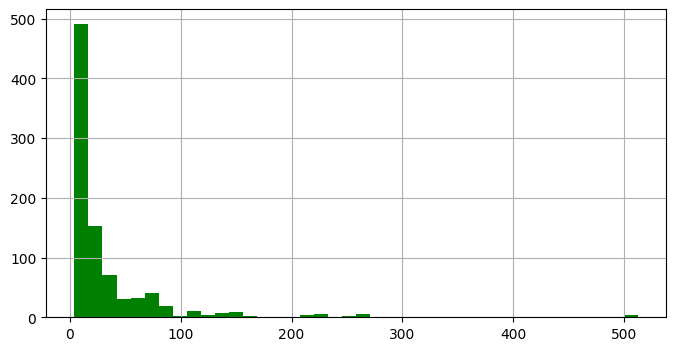

In [75]:
train['Fare'].hist(color='green',bins=40,figsize=(8,4))

<Axes: >

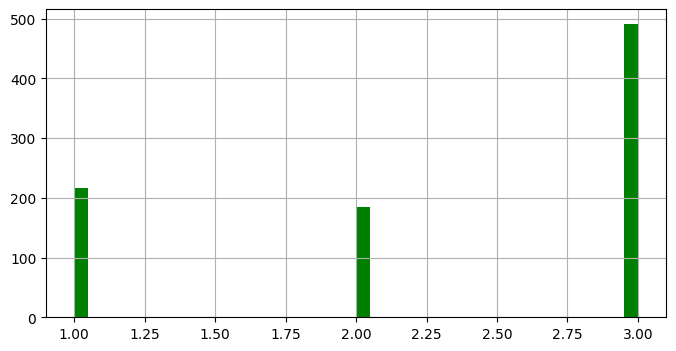

In [76]:
train['Pclass'].hist(color='green',bins=40,figsize=(8,4))

<Axes: >

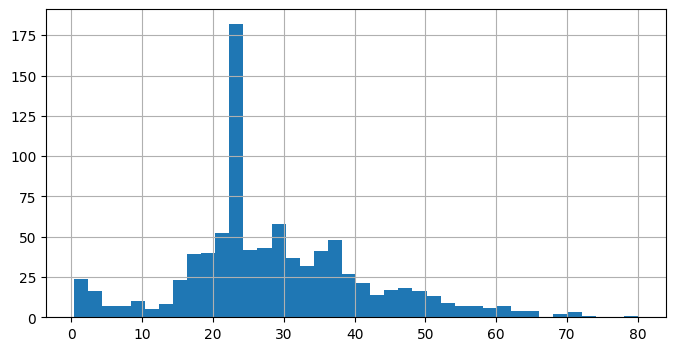

In [77]:
train['Age'].hist(bins=40,figsize=(8,4))

___
## Data Cleaning
We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation).
However we can be smarter about this and check the average age by passenger class. For example:


,mean,max,min,median
Pclass,,,,
1,38.062130,80.0,0.92,37.0
2,29.825163,70.0,0.67,29.0
3,24.824684,74.0,0.42,24.0


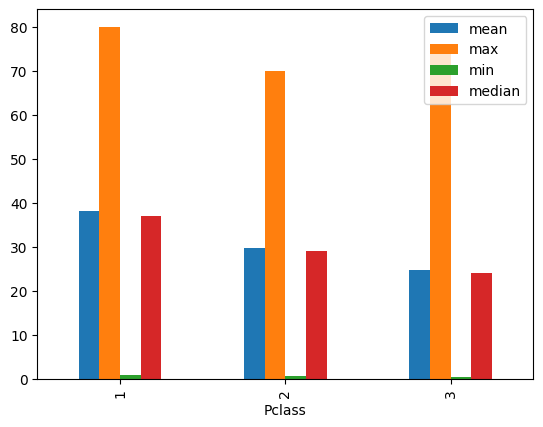

In [78]:
a = train.groupby("Pclass")["Age"].agg(["mean"  , "max" , "min" , "median"])
a.plot(kind="bar")
a

C:\Users\Matin\AppData\Local\Temp\ipykernel_844\1683851715.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')


<Axes: xlabel='Pclass', ylabel='Age'>

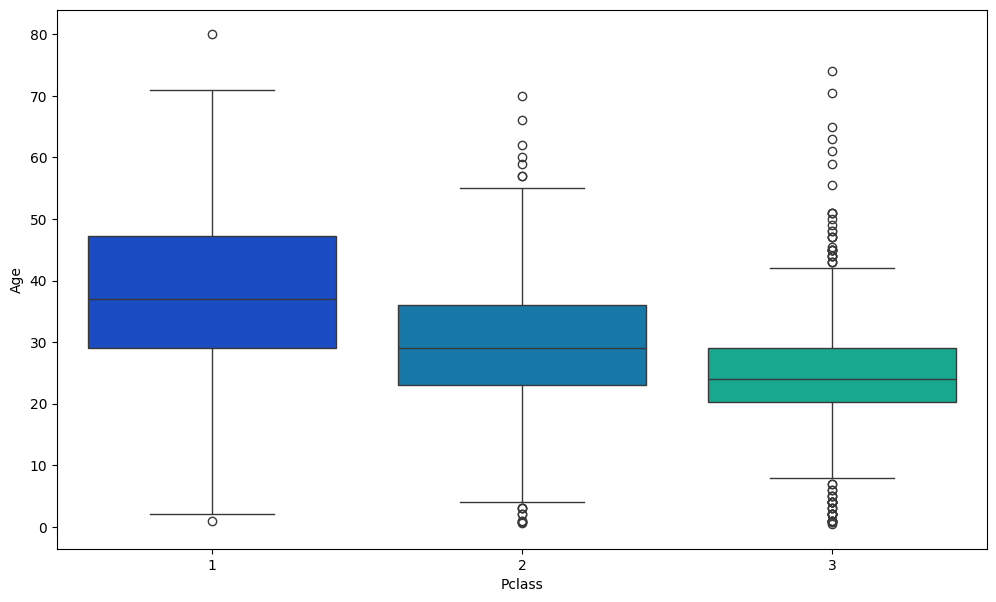

In [79]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.

In [80]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

Now apply that function!

In [81]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

Now let's check that heat map again!

Great! Let's go ahead and drop the Cabin column and the row in Embarked that is NaN.

In [82]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


## Converting Categorical Features 

We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [83]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 48.9 KB


In [84]:
train["Parch"].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

Great! Our data is ready for our model!

# Building a Logistic Regression model

Let's start by splitting our data into a training set and test set (there is another test.csv file that you can play around with in case you want to use all this data for training).

## Train Test Split

In [85]:
from sklearn.model_selection import train_test_split

In [ ]:
# train.drop('Survived',axis=1).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Sex     891 non-null    int64  
 2   Age     891 non-null    float64
 3   SibSp   891 non-null    int64  
 4   Parch   891 non-null    int64  
 5   Fare    891 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 41.9 KB


In [86]:
train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

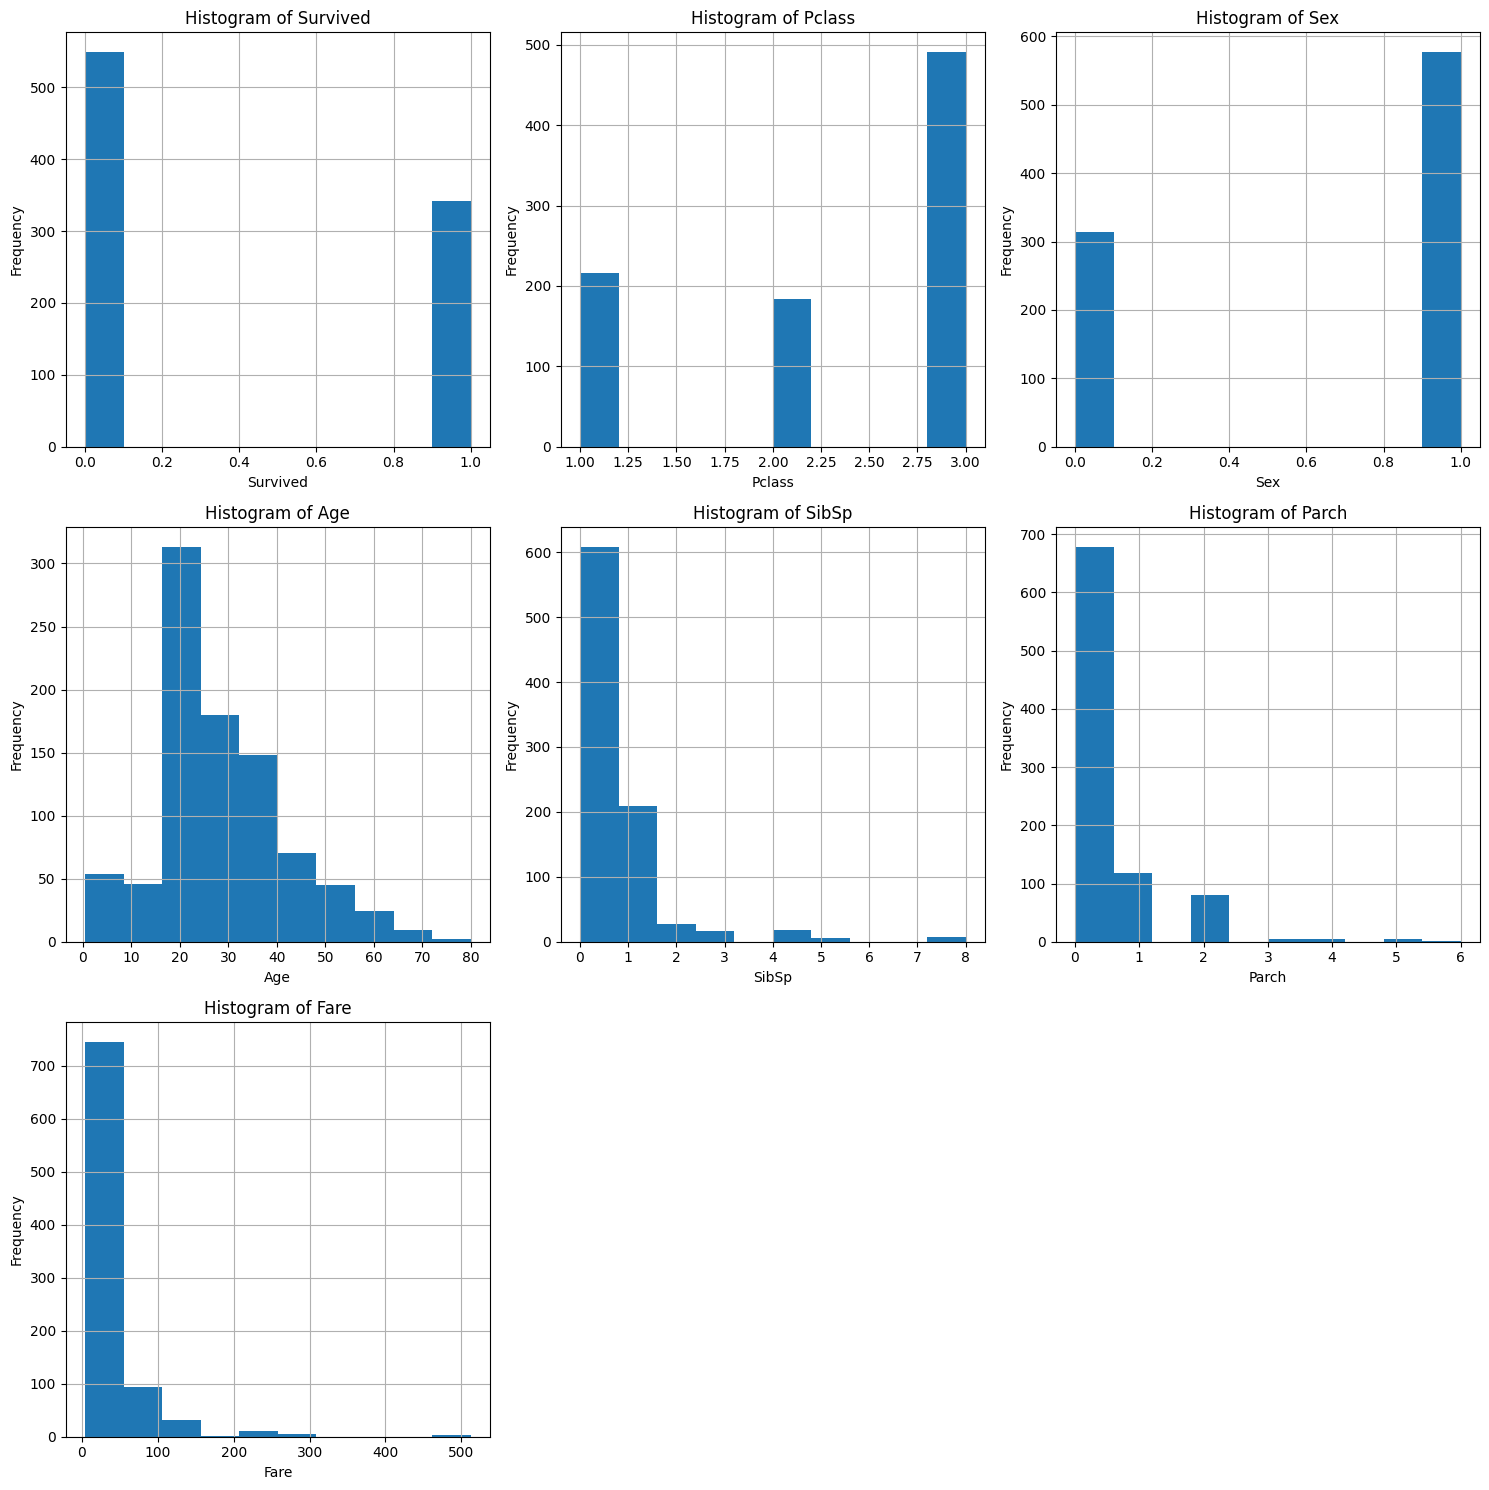

In [38]:
import matplotlib.pyplot as plt

num_columns = len(train.columns)
num_rows = (num_columns // 3) + (num_columns % 3 > 0)  

fig, axes = plt.subplots(num_rows, 3, figsize=(15, num_rows * 5))

axes = axes.flatten()

for idx, col in enumerate(train.columns):
    ax = axes[idx]
    train[col].hist(bins=10, ax=ax)
    ax.set_title(f'Histogram of {col}')
    ax.set_xlabel(col) 
    ax.set_ylabel('Frequency') 

for idx in range(num_columns, len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()


In [87]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), 
                                                    train['Survived'], test_size=0.30, 
                                                    random_state=101)

In [88]:
print(X_train)
print(X_test)
print(y_train)
print(y_test)

     Pclass  Sex   Age  SibSp  Parch      Fare
520       1    0  30.0      0      0   93.5000
510       3    1  29.0      0      0    7.7500
446       2    0  13.0      0      1   19.5000
2         3    0  26.0      0      0    7.9250
691       3    0   4.0      0      1   13.4167
..      ...  ...   ...    ...    ...       ...
575       3    1  19.0      0      0   14.5000
838       3    1  32.0      0      0   56.4958
337       1    0  41.0      0      0  134.5000
523       1    0  44.0      0      1   57.9792
863       3    0  24.0      8      2   69.5500

[623 rows x 6 columns]
     Pclass  Sex   Age  SibSp  Parch      Fare
331       1    1  45.5      0      0   28.5000
700       1    0  18.0      1      0  227.5250
748       1    1  19.0      1      0   53.1000
751       3    1   6.0      0      1   12.4750
481       2    1  29.0      0      0   14.0000
..      ...  ...   ...    ...    ...       ...
388       3    1  24.0      0      0    7.7292
416       2    0  34.0      1      1

## Training and Predicting

In [89]:
from sklearn.linear_model import LogisticRegression

In [90]:
logmodel = LogisticRegression(solver='liblinear')
logmodel.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [91]:
predictions = logmodel.predict(X_test)

In [92]:
y_test

331    0
700    1
748    0
751    1
481    0
      ..
388    0
416    1
407    1
482    0
829    1
Name: Survived, Length: 268, dtype: int64

In [93]:
predictions

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1], dtype=int64)

Let's move on to evaluate our model!

## Evaluation

We can check precision,recall,f1-score using classification report!

In [94]:
from sklearn.metrics import classification_report

In [95]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.77      0.86      0.81       154
           1       0.78      0.65      0.71       114

    accuracy                           0.77       268
   macro avg       0.77      0.76      0.76       268
weighted avg       0.77      0.77      0.77       268



In [96]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')


Accuracy: 0.7723880597014925
Confusion Matrix:
[[133  21]
 [ 40  74]]
